In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x,plt_contour_wgrad,plt_divergence,plt_gradients,plt_intuition,plt_update_onclick


In [11]:
x_train = np.array([1.0,2.0])
y_train = np.array([300,500])

In [12]:
def compute_cost(x,y,w,b):
    m = x_train.shape[0]
    cost = 0
    for i in range (m):
        f_wb = x[i] * w + b
        cost = cost + (f_wb - y[i]) ** 2
        total_cost = (1/(2*m)) * cost
    return total_cost
        

In [16]:
def compute_gradient(x,y,w,b):
    m = x_train.shape[0]
    dj_db = 0
    dj_dw = 0
    for i in range(m):
        f_wb = x[i] * w + b
        dj_dw_in = (f_wb - y[i]) * x[i]
        dj_db_in = (f_wb - y[i])
        dj_dw += dj_dw_in
        dj_db += dj_db_in
    dj_dw = dj_dw/m 
    dj_db = dj_db/m

    return dj_dw,dj_db
     
    
    

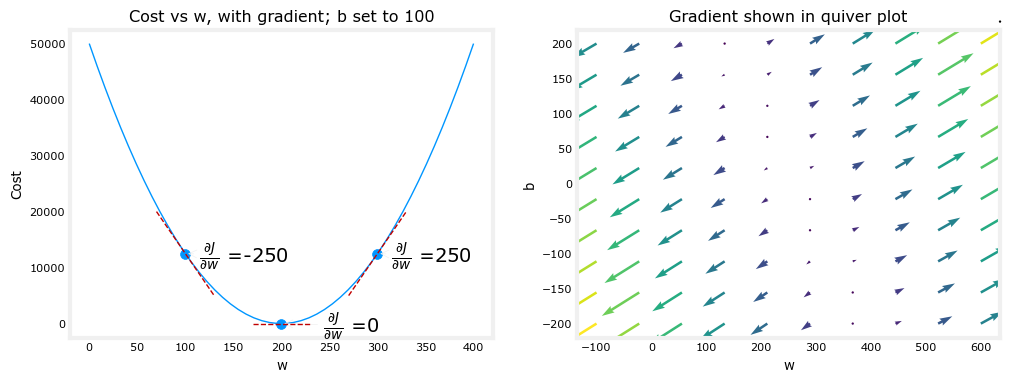

In [17]:
plt_gradients(x_train,y_train,compute_cost,compute_gradient)
plt.show()

In [20]:
def cost_function(x,y,w,b):
    m = x_train.shape[0]
    cost=0
    for i in range (m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
        total_cost = (1/(2*m)) * cost
    return total_cost

In [21]:
def cost_gradient(x,y,w,b):
    m = x_train.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range (m):
        f_wb = w * x[i] + b
        dj_dw_in = (f_wb - y[i]) * x[i]
        dj_db_in = f_wb - y[i]
        dj_dw += dj_dw_in
        dj_db += dj_db_in
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    
    return dj_dw,dj_db 

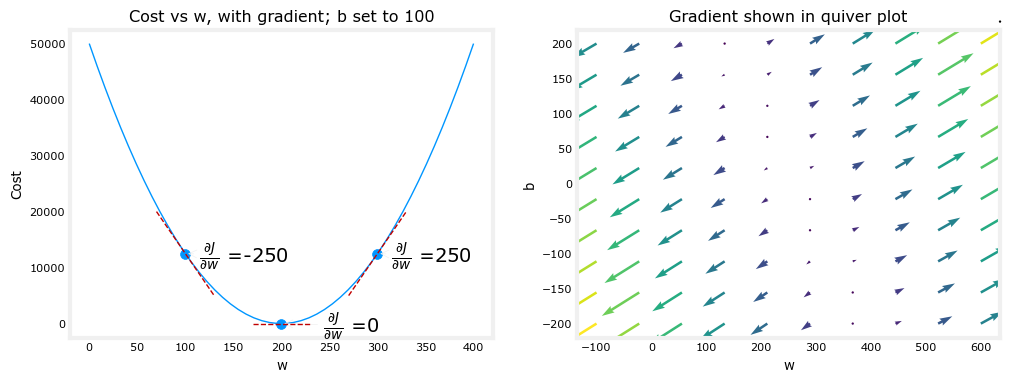

In [22]:
plt_gradients(x_train,y_train,compute_cost,compute_gradient)
plt.show()

In [33]:
def gredient_descent (x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    w = w_in
    b = b_in
    J_history = []   # cost for every parameters
    P_history = []   # w and b values for every iteration
    for i in range (num_iters):
        dj_dw , dj_db = gradient_function(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db
   
        if i < 100000 :
            J_history.append(cost_function(x,y,w,b))
            P_history.append([w,b])
        if i% math.ceil(num_iters/10) == 0 :
            print(f'iteration {i:4} : cost{J_history[-1]:0.2e}',
                  f'dj_dw: {dj_dw: 0.3e} dj_db: {dj_db: 0.3e}',
                  f'w: {w: 0.3e},b: {b: 0.5e}')

    return w,b,J_history,P_history
    

In [34]:
w_init = 0
b_init = 0

iteration = 10000
alpha_temp = 1.0e-2
w_final,b_final,J_history,P_history = gredient_descent(x_train,y_train,w_init,b_init,alpha_temp,iteration,cost_function,cost_gradient)
print (f'(w,b) found by gradient descent : ({w_final : 8.4f},{b_final : 8.4f})')

iteration    0 : cost7.93e+04 dj_dw: -6.500e+02 dj_db: -4.000e+02 w:  6.500e+00,b:  4.00000e+00
iteration 1000 : cost3.41e+00 dj_dw: -3.712e-01 dj_db:  6.007e-01 w:  1.949e+02,b:  1.08228e+02
iteration 2000 : cost7.93e-01 dj_dw: -1.789e-01 dj_db:  2.895e-01 w:  1.975e+02,b:  1.03966e+02
iteration 3000 : cost1.84e-01 dj_dw: -8.625e-02 dj_db:  1.396e-01 w:  1.988e+02,b:  1.01912e+02
iteration 4000 : cost4.28e-02 dj_dw: -4.158e-02 dj_db:  6.727e-02 w:  1.994e+02,b:  1.00922e+02
iteration 5000 : cost9.95e-03 dj_dw: -2.004e-02 dj_db:  3.243e-02 w:  1.997e+02,b:  1.00444e+02
iteration 6000 : cost2.31e-03 dj_dw: -9.660e-03 dj_db:  1.563e-02 w:  1.999e+02,b:  1.00214e+02
iteration 7000 : cost5.37e-04 dj_dw: -4.657e-03 dj_db:  7.535e-03 w:  1.999e+02,b:  1.00103e+02
iteration 8000 : cost1.25e-04 dj_dw: -2.245e-03 dj_db:  3.632e-03 w:  2.000e+02,b:  1.00050e+02
iteration 9000 : cost2.90e-05 dj_dw: -1.082e-03 dj_db:  1.751e-03 w:  2.000e+02,b:  1.00024e+02
(w,b) found by gradient descent : ( 199.

In [35]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


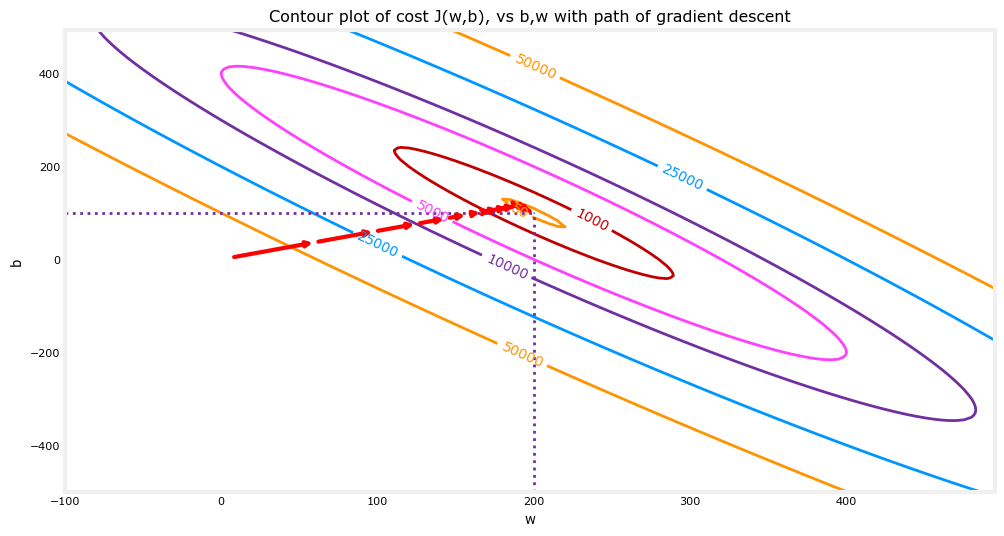

In [40]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))

plt_contour_wgrad(x_train,y_train,P_history,ax)